In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [2]:
# Generate training data
x = np.linspace(0.0,2*np.pi,20)
y = np.sin(x)

# Save training data to file
data = np.vstack((x,y)).T
np.savetxt('train_data.csv',data,header='x,y',comments = '',delimiter =',')

In [7]:
# Generate test data
x = np.linspace(0.0,2*np.pi,100)
y = np.sin(x)

# Save test data to file
data = np.vstack((x,y)).T
np.savetxt('test_data.csv',data,header='x,y',comments = '',delimiter =',')

In [10]:
# Scale data

#load training and test data with pandas
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Scale values from 
s = MinMaxScaler(feature_range=(0,1))

# Scale training and test data
sc_train = s.fit_transform(train_df)
sc_test = s.fit_transform(test_df)


In [14]:
# Print scaling adjustments
print('Scalar multipliers')
print(s.scale_)
print('Scalar minimum')
print(s.min_)

Scalar multipliers
[0.15915494 0.50006294]
Scalar minimum
[0.  0.5]


In [15]:
# Convert scaled values bact to dataframe
sc_train_df = pd.DataFrame(sc_train,columns = train_df.columns.values)
sc_test_df = pd.DataFrame(sc_test,columns = test_df.columns.values)

In [16]:
# Save scaled values to CSV files
sc_train_df.to_csv('train_scaled.csv',index=False)
sc_test_df.to_csv('test_scaled.csv',index=False)

In [17]:
# Train model

model = Sequential()
model.add(Dense(1, input_dim = 1, activation = 'linear'))
model.add(Dense(2, activation = 'linear'))
model.add(Dense(2, activation = 'tanh'))
model.add(Dense(2, activation = 'linear'))
model.add(Dense(1,activation = 'linear'))
model.compile(loss = 'mean_squared_error',optimizer ='adam') #minimize 

In [18]:
# Load training data
train_df = pd.read_csv('train_scaled.csv')
X1 = train_df.drop('y',axis = 1).values
Y1 = train_df[['y']].values

# Train the model
model.fit(X1, Y1, epochs = 5000, verbose = 0, shuffle =True)

In [ ]:
# Save the model to hard drive
#model.save('model.h5')

In [19]:
# Load test data
test_df = pd.read_csv('test_scaled.csv')
X2 = test_df.drop('y',axis=1).values
Y2 = test_df[['y']].values

In [20]:
#test the model
mse = model.evaluate(X2,Y2,verbose = 1)
print('Mean Squared Error',mse)

4/4 [==============================] - 11s 71ms/step - loss: 2.1793e-04
Mean Squared Error 0.0002179267321480438


In [22]:
# Prediction outside training region
# Generate prediction data
x = np.linspace(-2*np.pi,4*np.pi,100)
y = np.sin(x)

# Scale input: we apply the scale ourselve
X3 = x * s.scale_[0]+s.min_[0]
Y3P = model.predict(X3)

# Unscale output
yp = (Y3P - s.min_[1])/s.scale_[1]

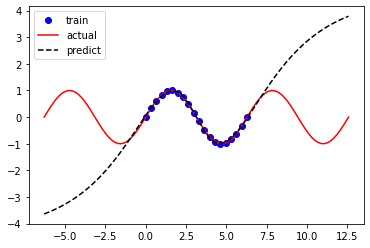

In [23]:
plt.figure()
plt.plot((X1 - s.min_[0])/s.scale_[0], \
         (Y1 - s.min_[1])/s.scale_[1], \
          'bo', label='train')
plt.plot(x,y,'r-',label='actual')
plt.plot(x,yp,'k--',label='predict')
plt.legend(loc='best')
#plt.savefig('results.png')
plt.show()